# Accessing Data from NHERI-Published Directory

> maintained by Scott J. Brandenberg and Charlie Dey  

A key benefit of the DesignSafe JupyterHub is that it lives in the cloud with the data that you want to work with. Why download all those large data files to your own computer when you can access the data directly? However, it might not be clear how to read files from the published data area. This notebook will illustrate how to do that, and will use PRJ-5772, cited below.

Buckreis, T., C. Nweke, P. Wang, S. Brandenberg, M. Ramos-Sepulveda, R. Shams, S. Mohammed, R. Pretell, S. Mazzoni, P. Zimmaro, J. Stewart (2025). Archive of an Earthquake Ground Motion Relational Database (GMDB) for Engineering Applications. [link](https://doi.org/10.17603/ds2-w0zm-y670)

The notebook also demonstrates several key aspects of working with data using the DesignSafe JupyterHub. We first use Pandas to open a CSV file and load it into a DataFrame. We then use Pandas filtering functions to clean up some issues. Several columns from the DataFrame are then converted to Numpy arrays for further processing. Matplotlib is then used to plot the data in various ways, and multiple linear regression is performed using Numpy array processing methods.

## Topics
1. Finding the path to a published dataset
2. Using Pandas to read CSV file and clean data
3. Convert Pandas data into Numpy arrays
4. Using Matplotlib to plot selected data
5. Perform linear regression using Numpy matrix operations

## Tools
1. Pandas
2. Numpy
3. Matplotlib

## 1. Finding the path to a published dataset

### 1.1 Search Data Depot  
The best way to find a dataset you might be interested in is to search the [DesignSafe data depot](https://designsafe-ci.org/data/browser/public/designsafe.storage.published). In this case, the phrase "GMDB", shorthand for "Ground Motion Database", was entered as a keyword and two projects were identified.  

![Data Depot screenshot](images/DataDepotPublished.png)
**Figure 1** Screenshot of published area of DesignSafe Data Depot.


### 1.2 Check out the project metadata and citation
For this training tutorial, we'll use PRJ-5772.  Clicking on the project brings us to the project landing page, which shows the project title, authors, description, and a citation. If you use data from the published area of DesignSafe, please cite the dataset as suggested. It is better to cite the data and include the DOI than to say something like "I got the data from DesignSafe". Data citations help us track impact, and points your readers to a more specific resource.  

![PRJ-5772 landing page screenshot](images/PRJ-5772-landing-page.png)
**Figure 2.** Screenshot of landing page for PRJ-5772.  


### 1.3 Read the README file and decide which data to use
After briefly consulting the README.pdf file, we realize that the data we want to open is in the "Flatfiles" directory. And specifically, we are interested in the flatfile containing the RotD50 component of the earthquake ground motion intensity measures, which is in the file named "GMDB_Rotd50_Flatfile_Version_1.csv". 


![flatfile](images/PRJ-5772-flatfiles.png)
**Figure 3.** Screenshot of flatfile folder in PRJ-5772.


### 1.4 Open DesignSafe JupyterHub
OK, so now we know which file we want. Let's pivot to opening that file through the DesignSafe JupyterHub. The first step is to open up a Jupyter server by going to [https://jupyter.designsafe-ci.org](https://jupyter.designsafe-ci.org), or through the Tools and Applications area of the [DesignSafe web portal](https://designsafe-ci.org/use-designsafe/tools-applications/analysis/jupyter/). Note that an HPC Jupyter instance is available through the DesignSafe web portal. We won't be using that here. We are using the basic JupyterHub, which runs on a virtual machine that has computational power similar to a PC.  

Once you have authenticated and your server has started, you will see several directories in the panel on the left, including CommunityData, MyData, MyProjects, NEES, NHERI-Published, and Work, as shown below.

![Jupyter launcher screenshot](images/JupyterLauncher.png)
**Figure 4.** Screenshot of launcher in DesignSafe JupyterHub.  


### 1.5 Browse to the file you want to open

Click on the NHERI-Published directory in the left panel. Be patient. There are lots of published projects, so it takes a while for that directory to load. Scroll down to PRJ-5772 and double click it. You should see a Flatfiles folder. Double-click that as well, and you will be in a directory with the data that we want to open, as shown below. 

![screenshot of NHERI-Published/PRJ-5772/Flatfiles directory](images/JupyterPRJ-5772-Flatfiles.png)
**Figure 5.** Screenshot of NHERI-Published/PRJ-5772/Flatfiles directory.  


### 1.6 Define the path to the file

Now that we've found the file we want to open, we need to set the path to the file within the DesignSafe JupyterHub. The best way to do this is to set the path relative to the home directory, which is /home/jupyter. That's the directory that contains the CommunityData, MyData, MyProjects, NEES, NHERI-Published, and Work directories. So the path to the NHERI-Published directory is /home/jupyter/NHERI-Published. Adding on the project file path for our specific project, we end up the path shown below

`/home/jupyter/NHERI-Published/PRJ-5772/Flatfiles/GMDB_RotD50_Flatfile_Version_1.csv`

Alternatively, you could specify a relative path between the current working directory and the file you want to open. However, we don't recommend using relative paths because if you ever need to share your notebook with someone else, or move it to a new directory, the relative path will not work and you'll need to change a bunch of stuff. So it's best to use the full path relative to the home directory. 

## 2. Using Pandas to read CSV file and clean data  

Now that we know the path to the file we want to open, let's use Pandas to load it into a DataFrame. Pandas is a Python package that makes it easy to open a wide range of data files, including CSV, HDF5, SQL databases, Microsfot Excel, and others. Pandas is also very useful for cleaning data files, merging DataFrames using shared fields (similar to a SQL JOIN statement), and other data-related tasks. We'll barely scratch the surface in this tutorial. We will use the [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function to open up the data file, and we'll then clean up some of the data using basic [indexing and data selection tools](https://pandas.pydata.org/docs/user_guide/indexing.html). To find out more about what you can do with Pandas, visit [https://pandas.pydata.org/](https://pandas.pydata.org/)

### 2.1 Read CSV file  

The data file that we want to open is a comma-separated value (CSV) file. Pandas has a function called `read_csv` that opens the data file and loads it into a DataFrame object. In this case, we'll load the entire file into a Pandas DataFrame even though we'll use only a small subset of the data. For more efficient workflows with large data files, it's good practice to use the built-in partial I/O functionality in Pandas. Specifically, you can use the `usecols` operator to limit the numer of columns you retrieve from the dataset, and a combination of `skiprows` and `nrows` to "chunk" the data. The file we are opening is over 200 MB, so it does take a few seconds to load the file, but the file is not so large that it can't be loaded into memory. We suggest that you copy this notebook to your own workspace (e.g., MyData), and play with the `read_csv` function options to see if you can improve the performance by limiting the columns that are read. In the cell below, we also import Pandas, Numpy, and Matplotlib since we'll use them in the notebook. Finally, we have set the `low_memory=False` option because a warning is issued if we leave that off. That's because some of the fields have data of mixed type. For example, the station_code field is sometimes only numbers, sometimes only letters, and sometimes a mix of both. By default, Pandas tries to use the same data type for each column to save memory. Setting `low_memory=False` disables this feature at the expense of performance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = "/home/jupyter/NHERI-Published/PRJ-5772/Flatfiles/GMDB_RotD50_Flatfile_Version_1.csv"
df = pd.read_csv(file, low_memory=False)

In [ ]:
# The df.head() function will print the first 5 rows of the dataframe to a human-readable table
df.head()

,motion_id,event_id,station_id,path_id,user_id,public_motion,hypocenter_longitude,hypocenter_latitude,event_country,event_subdivision,event_name,comcat_id,event_type_id,datetime,time_zone,hypocenter_reported_depth,hypocenter_reported_depth_datum,epicenter_elevation,hypocenter_depth,magnitude,magnitude_type,magnitude_uncertainty_Kagan_model,magnitude_uncertainty_statistical,magnitude_sample_size,magnitude_uncertainty_study_class,strike,dip,rake,mechanism_based_on_Rake,slip_rate,seismic_moment,p_plunge,p_trend,t_plunge,t_trend,coseismic_surface_rupture,basis_for_surface_rupture,extensional_regime,extensional_regime_name,event_type,finite_fault_id,ztor,fault_length,fault_width,fault_area,ffm_model,ffm_complexity,ffm_reference,finite_fault_citation_id,finite_fault_kinematic_parameter_id,average_fault_displacement,rise_time,average_slip_velocity,preferred_rupture_velocity,average_vr_vs,percent_moment_release,existence_of_shallow_asperity,depth_to_shallowest_asperity,site_id,network_id,station_name,station_latitude,station_longitude,station_elevation,station_code,housing,cosmos_station_type,sensor_depth,installation_date,removal_date,network_code,network_name,network_type,start_date,end_date,operation_org,doi,network_citation_id,site_longitude,site_latitude,site_elevation,site_country,site_subdivision,site_name,vs30,vs30_lnstd,vs30_code_id,vs30_ref,geological_unit,geological_ref,geological_citation_id,slope_gradient,slope_resolution,terrain_class,terrain_citation_id,z1p0_preferred,z1p0_preferred_lnstd,z1p0_code_id,z2p5_preferred,z2p5_preferred_lnstd,z2p5_code_id,basin_province,gmx_c2,gmx_c3,rsbe,rcebe,epicentral_distance,hypocentral_distance,rjb,rrup,rx,ry,ry0,ravg,rebe,rsbe1,closest_point_latitude,closest_point_longitude,closest_point_depth,hanging_wall,source_to_site_azimuth,X,theta_D,Y,phi_D,ssga_strike_slip,ssga_dip_slip,s,d,ctildepr,T,U,time_series_metadata_id,instrument_type,colocated_instrument,instrument_natural_frequency,sampling_rate,late_p_trigger,late_s_trigger,multiple_wave_train,processing_type,filter_type,order_hpass,order_lpass,azimuth_h1,azimuth_h2,hpass_fc_h1,hpass_fc_h2,hpass_fc_v,lpass_fc_h1,lpass_fc_h2,lpass_fc_v,usable_frequency_factor,public_time_series,time_series_citation_id,pga_rotd50,pgv_rotd50,cav_rotd50,cav5_rotd50,ia_rotd50,damping,psa_rotd50(0p010s),psa_rotd50(0p020s),psa_rotd50(0p022s),psa_rotd50(0p025s),psa_rotd50(0p029s),psa_rotd50(0p030s),psa_rotd50(0p032s),psa_rotd50(0p035s),psa_rotd50(0p036s),psa_rotd50(0p040s),psa_rotd50(0p042s),psa_rotd50(0p044s),psa_rotd50(0p045s),psa_rotd50(0p046s),psa_rotd50(0p048s),psa_rotd50(0p050s),psa_rotd50(0p055s),psa_rotd50(0p060s),psa_rotd50(0p065s),psa_rotd50(0p067s),psa_rotd50(0p070s),psa_rotd50(0p075s),psa_rotd50(0p080s),psa_rotd50(0p085s),psa_rotd50(0p090s),psa_rotd50(0p095s),psa_rotd50(0p100s),psa_rotd50(0p110s),psa_rotd50(0p120s),psa_rotd50(0p130s),psa_rotd50(0p133s),psa_rotd50(0p140s),psa_rotd50(0p150s),psa_rotd50(0p160s),psa_rotd50(0p170s),psa_rotd50(0p180s),psa_rotd50(0p190s),psa_rotd50(0p200s),psa_rotd50(0p220s),psa_rotd50(0p240s),psa_rotd50(0p250s),psa_rotd50(0p260s),psa_rotd50(0p280s),psa_rotd50(0p290s),psa_rotd50(0p300s),psa_rotd50(0p320s),psa_rotd50(0p340s),psa_rotd50(0p350s),psa_rotd50(0p360s),psa_rotd50(0p380s),psa_rotd50(0p400s),psa_rotd50(0p420s),psa_rotd50(0p440s),psa_rotd50(0p450s),psa_rotd50(0p460s),psa_rotd50(0p480s),psa_rotd50(0p500s),psa_rotd50(0p550s),psa_rotd50(0p600s),psa_rotd50(0p650s),psa_rotd50(0p667s),psa_rotd50(0p700s),psa_rotd50(0p750s),psa_rotd50(0p800s),psa_rotd50(0p850s),psa_rotd50(0p900s),psa_rotd50(0p950s),psa_rotd50(1p000s),psa_rotd50(1p100s),psa_rotd50(1p200s),psa_rotd50(1p300s),psa_rotd50(1p400s),psa_rotd50(1p500s),psa_rotd50(1p600s),psa_rotd50(1p700s),psa_rotd50(1p800s),psa_rotd50(1p900s),psa_rotd50(2p000s),psa_rotd50(2p200s),psa_rotd50(2p400s),psa_rotd50(2p500s),psa_rotd50(2p600s),psa_rotd50(2p800s),psa_rotd50(3p000s),psa_rotd50(3p200s),psa_rotd50(3p400s),psa_rotd50(3p500s),psa_rotd50(3p600s),psa_rotd50(3p800s),psa_rotd50(4p

In [ ]:
# In our case, this DataFrame has a really large number of columns, and Pandas doesn't show them all by default.
# If we want to see more columns, we can use the pd.set_option() command to increase the number of displayed columns.

pd.set_option('display.max_columns', 1000)
df.head()

,motion_id,event_id,station_id,path_id,user_id,public_motion,hypocenter_longitude,hypocenter_latitude,event_country,event_subdivision,event_name,comcat_id,event_type_id,datetime,time_zone,hypocenter_reported_depth,hypocenter_reported_depth_datum,epicenter_elevation,hypocenter_depth,magnitude,magnitude_type,magnitude_uncertainty_Kagan_model,magnitude_uncertainty_statistical,magnitude_sample_size,magnitude_uncertainty_study_class,strike,dip,rake,mechanism_based_on_Rake,slip_rate,seismic_moment,p_plunge,p_trend,t_plunge,t_trend,coseismic_surface_rupture,basis_for_surface_rupture,extensional_regime,extensional_regime_name,event_type,finite_fault_id,ztor,fault_length,fault_width,fault_area,ffm_model,ffm_complexity,ffm_reference,finite_fault_citation_id,finite_fault_kinematic_parameter_id,average_fault_displacement,rise_time,average_slip_velocity,preferred_rupture_velocity,average_vr_vs,percent_moment_release,existence_of_shallow_asperity,depth_to_shallowest_asperity,site_id,network_id,station_name,station_latitude,station_longitude,station_elevation,station_code,housing,cosmos_station_type,sensor_depth,installation_date,removal_date,network_code,network_name,network_type,start_date,end_date,operation_org,doi,network_citation_id,site_longitude,site_latitude,site_elevation,site_country,site_subdivision,site_name,vs30,vs30_lnstd,vs30_code_id,vs30_ref,geological_unit,geological_ref,geological_citation_id,slope_gradient,slope_resolution,terrain_class,terrain_citation_id,z1p0_preferred,z1p0_preferred_lnstd,z1p0_code_id,z2p5_preferred,z2p5_preferred_lnstd,z2p5_code_id,basin_province,gmx_c2,gmx_c3,rsbe,rcebe,epicentral_distance,hypocentral_distance,rjb,rrup,rx,ry,ry0,ravg,rebe,rsbe1,closest_point_latitude,closest_point_longitude,closest_point_depth,hanging_wall,source_to_site_azimuth,X,theta_D,Y,phi_D,ssga_strike_slip,ssga_dip_slip,s,d,ctildepr,T,U,time_series_metadata_id,instrument_type,colocated_instrument,instrument_natural_frequency,sampling_rate,late_p_trigger,late_s_trigger,multiple_wave_train,processing_type,filter_type,order_hpass,order_lpass,azimuth_h1,azimuth_h2,hpass_fc_h1,hpass_fc_h2,hpass_fc_v,lpass_fc_h1,lpass_fc_h2,lpass_fc_v,usable_frequency_factor,public_time_series,time_series_citation_id,pga_rotd50,pgv_rotd50,cav_rotd50,cav5_rotd50,ia_rotd50,damping,psa_rotd50(0p010s),psa_rotd50(0p020s),psa_rotd50(0p022s),psa_rotd50(0p025s),psa_rotd50(0p029s),psa_rotd50(0p030s),psa_rotd50(0p032s),psa_rotd50(0p035s),psa_rotd50(0p036s),psa_rotd50(0p040s),psa_rotd50(0p042s),psa_rotd50(0p044s),psa_rotd50(0p045s),psa_rotd50(0p046s),psa_rotd50(0p048s),psa_rotd50(0p050s),psa_rotd50(0p055s),psa_rotd50(0p060s),psa_rotd50(0p065s),psa_rotd50(0p067s),psa_rotd50(0p070s),psa_rotd50(0p075s),psa_rotd50(0p080s),psa_rotd50(0p085s),psa_rotd50(0p090s),psa_rotd50(0p095s),psa_rotd50(0p100s),psa_rotd50(0p110s),psa_rotd50(0p120s),psa_rotd50(0p130s),psa_rotd50(0p133s),psa_rotd50(0p140s),psa_rotd50(0p150s),psa_rotd50(0p160s),psa_rotd50(0p170s),psa_rotd50(0p180s),psa_rotd50(0p190s),psa_rotd50(0p200s),psa_rotd50(0p220s),psa_rotd50(0p240s),psa_rotd50(0p250s),psa_rotd50(0p260s),psa_rotd50(0p280s),psa_rotd50(0p290s),psa_rotd50(0p300s),psa_rotd50(0p320s),psa_rotd50(0p340s),psa_rotd50(0p350s),psa_rotd50(0p360s),psa_rotd50(0p380s),psa_rotd50(0p400s),psa_rotd50(0p420s),psa_rotd50(0p440s),psa_rotd50(0p450s),psa_rotd50(0p460s),psa_rotd50(0p480s),psa_rotd50(0p500s),psa_rotd50(0p550s),psa_rotd50(0p600s),psa_rotd50(0p650s),psa_rotd50(0p667s),psa_rotd50(0p700s),psa_rotd50(0p750s),psa_rotd50(0p800s),psa_rotd50(0p850s),psa_rotd50(0p900s),psa_rotd50(0p950s),psa_rotd50(1p000s),psa_rotd50(1p100s),psa_rotd50(1p200s),psa_rotd50(1p300s),psa_rotd50(1p400s),psa_rotd50(1p500s),psa_rotd50(1p600s),psa_rotd50(1p700s),psa_rotd50(1p800s),psa_rotd50(1p900s),psa_rotd50(2p000s),psa_rotd50(2p200s),psa_rotd50(2p400s),psa_rotd50(2p500s),psa_rotd50(2p600s),psa_rotd50(2p800s),psa_rotd50(3p000s),psa_rotd50(3p200s),psa_rotd50(3p400s),psa_rotd50(3p500s),psa_rotd50(3p600s),psa_rotd50(3p800s),psa_rotd50(4p

## 2.2 Clean the data  

Datasets often need to be cleaned up before we can use them. In this case, we want to use the following data columns:  

1. `pga_rotd50` = the RotD50 component of peak ground acceleration
2. `magnitude` = earthquake magnitude
3. `rjb` = Joyner-Boore distance between a site and the surface projection of the fault rupture
4. `vs30` = Time-averaged shear wave velocity in the upper 30 m of a site
5. `event_subdivision` = general location where the event occurred 

We need to make sure that all of the pga_rotd50 values are larger than zero. In some cases, there is so much noise in a ground motion record that we can't accurately measure peak acceleration, though we can measure other intensity measures like peak ground velocity, duration, spectral acceleration at various periods, etc. When `pga_rotd50` cannot be accurately measured, it is either left blank, in which case it will be represented as NaN in the dataframe, or it will be assigned a value of -999. Similarly, we need to make sure that `rjb` is greater than or equal to zero. Furthermore, we're not interested in modeling very small magnitude events, so we'll only look at magnitudes larger than 4. And finally, we will take out only the events that occur in California since earthquake ground motions often exhibit regional features.

In [ ]:
df = df[df.pga_rotd50 > 0]
df = df[df.rjb >= 0]
df = df[df.magnitude >= 4]
df = df[df.event_subdivision == 'California']

## 3. Convert Pandas data columns to Numpy arrays  

Pandas is great for opening data files and cleaning datasets, but it's not quite as great for working with numerical data, performing complex operations on data, working with matrices, etc. For example, the Panda's iloc feature is incredibly slow when used within Python loops or for repetitive operations on large datasets. That's where Numpy comes in.

[Numpy](https://numpy.org/) is an open source Python package that enables efficient numerical computing. Python is inherently slow because it's an interpreted language, and the interpreter does a lot of work at runtime, particularly if you use loops. Python is very convenient because you don't need to declare variable types, allocate memory, and all of those other tasks required in a compiled language like C, C++, or Fortran. That's because the interpreter does that work for you when you run the code. But that convenience comes at the expense of computational efficiency. A previous [DesignSafe training session](https://designsafe-ci.github.io/training-accelerating-python/) covered this in detail. Although Numpy is a Python package, it is not written in Python. It is primarily written in C, and consists of well-optimized and efficient compiled code. If you ever have to decide between writing your own code using Python loops, or using a Numpy function that does the same thing, the Numpy option will be significantly faster. In general you should always look for a Numpy option before writing your own code.

To convert a Pandas data column to a Numpy array, you can simply use the .values operator. Those conversions are performed in the cell below.

In [ ]:
pga_rotd50 = df.pga_rotd50.values
rjb = df.rjb.values
magnitude = df.magnitude.values
vs30 = df.vs30.values

## 4. Use Matplotlib to plot selected data quantities

We'll make two data plots to illustrate key features of Matplotlib. First, we'll plot `magnitude` vs. `rjb` to illustrate the coverage of ground motion data in this space. Second, we'll plot `pga_rotd50` vs. `rjb` using different color symbols for different magnitude bins.

### 4.1 Plot of magnitude vs. distance

A figure that we often use to represent data coverage in a ground motion dataset is magnitude vs. distance. Each earthquake is generally recorded by many different sensors, so the plot ends up having horizontal stripes. We'll use the [matplotlib](https://matplotlib.org) Python package to plot `magnitude` vs. `rjb`. Specifically, we'll first use the Matplotlib [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) wrapper to great a figure and axis object. We'll then make a scatter plot with small symbols representing each ground motion. We'll fill the symbols with a white color, and use the Matplotlib default colormap (viridis) to color the edge of the markers as the default first color 'C0'. We then label the x- and y-axes using [raw strings](https://realpython.com/python-raw-strings/) and [LaTeX](https://jupyterbook.org/en/stable/content/math.html). We'll then set the x-axis to a log scale and add gridlines. We'll use the `zorder` parameter to put the datapoints on top of the gridlines.

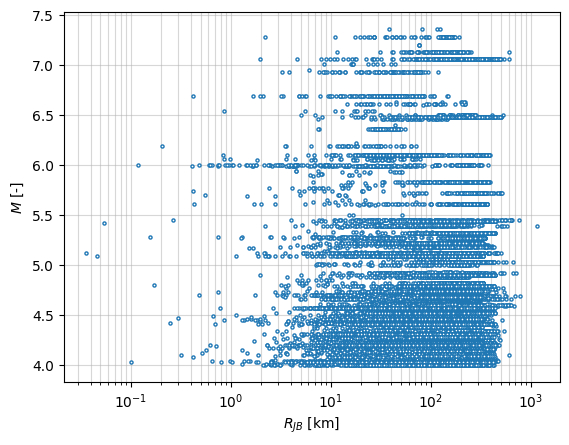

In [ ]:
fig, ax = plt.subplots()
ax.scatter(rjb, magnitude, s=5, facecolor='white', edgecolor='C0', zorder=2)
ax.set_xlabel(r'$R_{JB}$ [km]')
ax.set_ylabel(r'$M$ [-]')
ax.set_xscale('log')
ax.grid(True, alpha=0.5, which='both', zorder=1)

### 4.2 Plot of pga_rotd50 vs. rjb  

Let's also make a plot of `pga_rotd50` vs. `rjb`. A problem is that shaking intensity depends jointly on magnitude and distance (among other factors not considered here, like style of faulting and site response), so a plot of `pga_rotd50` vs. `rjb` doesn't make a lot of sense without separately considering `magnitude`. One way to do this would be to make a 3D scatter plot. But 3D scatter plots are often unclear in static visualizations due to depth perception. So instead we'll make a 2D scatter plot with different colors for different magnitude bins. We'll use [Numpy array filtering](https://www.w3schools.com/python/numpy/numpy_array_filter.asp) to bin the data.

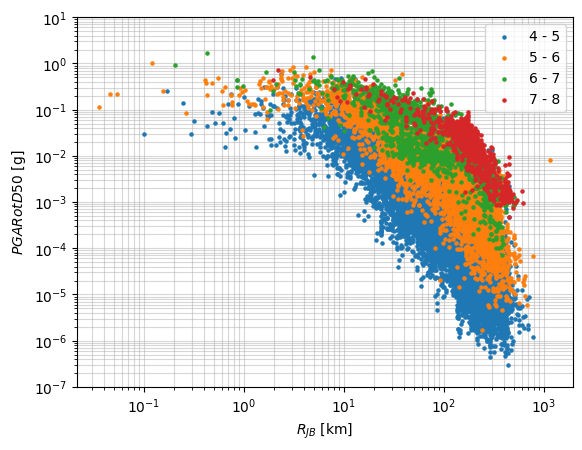

In [ ]:
magnitude_bins = [4, 5, 6, 7, 8]
fig, ax = plt.subplots()
for i in range(len(magnitude_bins) - 1):
    filt = (magnitude > magnitude_bins[i]) & (magnitude <= magnitude_bins[i + 1])
    ax.scatter(rjb[filt], pga_rotd50[filt], label = str(magnitude_bins[i]) + ' - ' + str(magnitude_bins[i+1]), s=5, zorder=2)
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$R_{JB}$ [km]')
ax.set_ylabel(r'$PGA RotD50$ [g]')
ax.set_ylim(1.e-7,10)
ax.grid(True, alpha=0.5, which='both', zorder=1)

## 5. Perform multi-linear regression and residuals analysis  

The final task for this training session is to perform a multi-linear regression, and subsequently check whether our model is biased with respect to an unmodeled variable (`vs30` in this case). 

### 5.1 Multi-linear regression  

A very basic and simple functional form for ground motion modeling is:  

$ln \left( Y_{ij} \right) = a + b M_i + d \cdot ln \left(R_{ij} + c \right) + \varepsilon \sigma$  

where $Y_{ij}$ is the ground motion intensity measure for earthquake event $i$ recorded at site $j$, $M_i$ is the magnitude for event $i$, $R_{ij}$ is the distance from site $j$ to event $i$, $a$, $b$, and $d$ are regression constants, $c$ is a constant that is often fixed (we'll use $c = 12$ km here), $\sigma$ is the standard deviation of the error, and $\varepsilon$ is the standard normal variate. These models generally also include a term related to style of faulting since shaking intensity is different for strike-slip, reverse, and normal faults. But we're ignoring that for simplicity here. Since this is such a basic model and we're ignoring style of faulting and site response, we expect that $\sigma$ will be pretty large. Refining the model could reduce $\sigma$, resulting in a more accurate model.

The basic ground motion model is a linear equation that can be represented as:  

$ln(Y) = \sum \beta X$  

where $ln(Y)$ is a 1D array containing the natural logs of `pga_rotd50`, $X$ is a multidimensional array representing the model feature(s), and $\beta$ is an array of model coefficients obtained through least squares regression. The least squares solution is given by:  

$\beta = \left( X^T X \right) ^ {-1} X ^ T Y$  

In this case, $\beta = [a, b, d]$, and $X$ must therefore have dimensions of N x 3, where N is the number of recorded ground motions. To accommodate the intercept term $a$, we need to include a column of ones in the $X$ array. Therefore, we have $X = [\underline{1}, M, ln(rjb + 12.0)]$. To form the $X$ array, we use the Numpy [vstack](https://numpy.org/doc/2.3/reference/generated/numpy.vstack.html) operator. The result is an array with dimensions of 3 x N, which is actually $X^T$. So we swap the locations of the transpose operator from the least squares regression equation when we solve the linear system of equations. Finally, we use the Numpy linear algebra package solver, [linalg.solve](https://numpy.org/doc/2.0/reference/generated/numpy.linalg.solve.html), to solve for $\beta$.  

In [ ]:
X = np.vstack((np.ones(len(rjb), dtype=float), magnitude, np.log(rjb + 12.0)))
Y = np.log(pga_rotd50)
beta = np.linalg.solve(X @ X.T, X @ Y)
print('beta = ', beta)

beta =  [-3.59265985  1.77995717 -2.46278164]


### 5.2 Residuals analysis  

Residuals are defined as the measurements minus the model predictions. In this case, we define residuals as $ln(Y) - \beta X$. In ground motion modeling, it is common to plot residuals vs. various unmodeled variables to ascertain whether model refinements would provide predictive power, generally quantified by the reduction in $\sigma$ that could be achieved. Model refinements add complexity, and the decision of whether to introduce a model refinement involves consideration of tradeoffs between simplicity and accuracy, and also the potential for overfitting. In this case, we won't actually refine the model, but we'll look at whether the model residuals are biased with respect to $V_{S30}$.

In [ ]:
# Compute residuals (data minus model) and their standard deviation
res = Y - beta @ X
sigma = np.std(res)
print(sigma)

1.121245602582501


### 5.3 Plot residuals vs. $V_{S30}$

Now let's look at the residuals vs. $V_{S30}$ to see if there are any site response effects. There is so much data here that it is often difficult to clearly see the trends. For this reason, we are also plotting binned-means, which we compute by first using the [numpy.argsort](https://numpy.org/doc/2.0/reference/generated/numpy.argsort.html) function to compute an array of indices that will sort the `vs30` array in ascending order, then by applying the [numpy.array_split](https://numpy.org/doc/2.0/reference/generated/numpy.array_split.html) function to split the sorted array into sub-arrays with approximately equal size. The `array_split` function returns a Python list of Numpy arrays rather than a multi-dimensional Numpy array because the sub-arrays have different sizes, and therefore don't fit nicely into a Numpy array of defined shape. So we use a Python loop over the list to compute the mean value of each bin instead of using a vectorized Numpy operation. However, the loop has only `Nbins` number of elements, and the computational overhead is light.

(-10.0, 10.0)

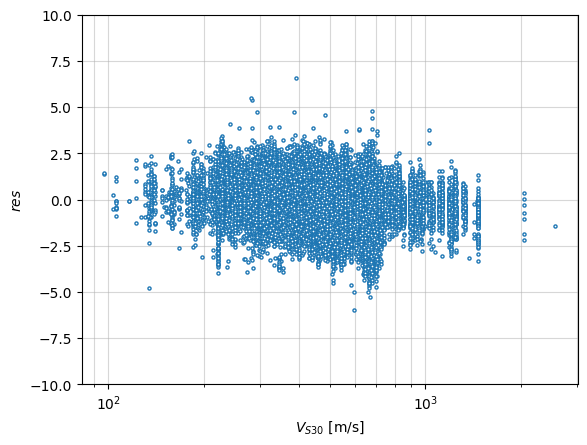

In [ ]:
fig, ax = plt.subplots()
Nbins = 50
ind = np.argsort(vs30)
vs30_bins = np.array_split(vs30[ind], Nbins)
res_bins = np.array_split(res[ind], Nbins)
vs30_binned_means = np.empty(Nbins, dtype=float)
res_binned_means = np.empty(Nbins, dtype=float)
for i in range(Nbins):
    vs30_binned_means[i] = np.mean(vs30_bins[i])
    res_binned_means[i] = np.mean(res_bins[i])
ax.scatter(vs30, res, s = 5, zorder = 2, facecolor='white', edgecolor='C0', label='data')
ax.scatter(vs30_binned_means, res_binned_means, s=20, zorder=3, facecolor='white', edgecolor='C1', label='binned means')
ax.set_xscale('log')
ax.grid(True, alpha=0.5, which='both', zorder=1)
ax.set_xlabel(r'$V_{S30}$ [m/s]')
ax.set_ylabel(r'$res$')
ax.set_ylim(-10,10)
ax.legend()

### 5.4 Conclusions from analysis of residuals
We see that the residuals are clearly biased, with positive residuals (under-prediction) corresponding to low $V_{S30}$, and negative residuals at high $V_{S30}$. Soft soils are known to amplify low-intensity ground motions, and can either amplify or de-amplify large ground motions. This effect is handled in modern ground motion models through analysis of site effects, which are often divided into linear and nonlinear components. We could in principle reduce uncertainty by accounting for $V_{S30}$ by including it as a model feature. We could also use a better magnitude and distance scaling formulation, and we could account for style of faulting, and other features that influence ground motion. Recall that the functional form we have used here is very basic. The resulting $\sigma$ is very high compared with modern ground motion models that better account for features known to influence ground motions (e.g., $\sigma \approx 0.6-0.7$ is more common). Furthermore, modern ground motion models partition uncertainty in the total residuals into different contributions, including event terms and site terms. We won't refine the model today because we've reached the end of the training here, but we didn't want to leave the impression that we've developed a good ground motion model here.